### Ensemble Learning

Ensemble Learning은 여러 개의 동질적이거나 base model 혹은 weak learner를 동일한 문제에 대해 다른 표본으로 훈련시킨 후 결과를 종합하거나 순차적으로 훈련시켜서 예측의 분산과 편향을 줄여준다

#### 1. Bagging

```
sklearn.ensemble.BaggingClassifier(
    estimator=None, 
    n_estimators=10, *, 
    max_samples=1.0, 
    max_features=1.0, 
    bootstrap=True, 
    bootstrap_features=False, 
    oob_score=False, 
    warm_start=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    base_estimator='deprecated')
```

배깅(Bagging)은 Ensemble Learning의 하나로, sklearn에서는 `BaggingClassifier`와 `RandomForestClassifier`가 존재한다 (회귀 모형 또한 존재한다)


**1.1 Booststrap Sampling**

Bagging(Bootstrap Aggregation)은 예측 시 분산을 축소하는 효과적인 방법이다. 배깅은 다음과 같은 단계를 따른다. 첫째, Bootstrap Sampling을 통해 N개의 Training Data set을 생성한다. 주어진 data set을 모집단으로 가정하고, 여러개의 sub dataset을 추출하여 표본집단으로 가정한 뒤 이 과정을 여러번 복원추출하여 사용한다.

$$\mathcal{D}\left(x_i,y_i\right)=\{\left(x_1,y_1\right),\left(x_2,y_2\right),\ldots,\left(x_n,y_n\right)\}$$
$$\mathcal{D}\left(x_i^\ast,y_i^\ast\right)=\{\left(x_1^\ast,y_1^\ast\right),\left(x_2^\ast,y_2^\ast\right),\ldots,\left(x_n^\ast,y_n^\ast\right)\}$$

둘째, 각각의 Training Set에 적합화된 N개의 추정 계수를 구한다. 이 추정 계수들을 각각 독립적이로 추정되기 때문에 모형은 병렬로 적합화될 수 있다

셋째, Ensemble Learner의 예측을 N개의 모델로부터 생성된 각 개별 예측의 단순 평균이다. Categorical 변수의 경우 관측치가 어떤 클래스에 속할 확률은 관측을 그 클래스 멤버로 분류한 추정기의 비율로 계산한다. 기초 추정기가 예측 확률을 갖고 예측할 수 있으면 배깅 분류기는 확률의 평균을 도출할 수 있다.

**1.2 분산 축소 알고리즘**

배깅의 주요 장점은 예측의 분산을 줄이는 것이다. 그러므로, Overfitting을 해결하는데 도움이 된다. 배깅 모형의 예측 분산은 배깅의 추정 계수 (N), 단일 추정 계수 예측의 평균, 분산, 그리고 이들 예측 간의 평균 상관관계에 대한 함수이다

$$
\begin{matrix}
V\left[ \frac{1}{N} \sum_{i=1}^N \varphi_i[c]\right]  & = & \frac{1}{N^2}\sum_{i=1}^N \left( \sum_{j=1}^N \sigma_{i,j}\right) \\
& = & \frac{1}{N^2} \sum_{i=1}^N \left( \sigma_i^2 + \sum_{j \neq i}^N \sigma_i \sigma_j \rho_{i,j}\right) \\
& = & \frac{1}{N^2}\sum_{i=1}^N \left( \bar{\sigma}^2 + \sum_{j \neq i}^N \bar{\sigma}^2 \bar{\rho}\right) \\
& = & \frac{\bar{\sigma}^2 + (N-1)\bar{\sigma}^2 \bar{\rho}}{N} \\
& = & \bar{\sigma}^2 \big( \bar{\rho} + \frac{1 - \bar{\rho}}{N}\big)
\end{matrix}
$$

여기서 $\sigma_{i,j}$는 추정기 $i,j$에 의한 predicted covariance이다

$$\sum_{i=1}^{N}\bar{\sigma^2}=\sum_{i=1}^{N}\sigma_i^2\Leftrightarrow\bar{\sigma^2}N^{-1}\sum_{i=1}^{N}\sigma_i^2$$
$$\sum_{j\neq i}^{N}{\bar{\sigma_i^2}\bar{\rho}}=\sum_{j\neq i}^{N}{\sigma_i\sigma_j\sigma_{i,j}}\Leftrightarrow\bar{\rho^2}=\left(\sigma^2N\left(N-1\right)\right)^{-1}\sum_{j\neq i}^{N}{\sigma_i\sigma_j\sigma_{i,j}}$$

위 식에서 $\bar{\rho}\rightarrow1\Rightarrow V\left[\frac{1}{2}\sum_{i=1}^{N}{\varphi_i\left[c\right]}\right]\rightarrow\bar{\sigma^2}$이므로 배깅이 $\bar{\rho}<1$에 대해서만 효과적이라는 것을 식에서 보여 준다. 즉, Machine Learning Algorithm이라고 어떠한 데이터를 넣어도 되는 것이 아니라 추정 성능의 극대화를 위해서는 데이터의 품질이 매우 중요하다

**1.3 개선된 정확도**

$N$개의 독립된 분류 기간의 다수결에 의해 $k$개 클래스를 예측하는 배깅 분류기를 생각해 보자. 예측은 ${0,1}$로 labeling할 수 있는데, 여기서 1은 정확한 예측을 의미한다. 분류기의 정확도는 예측을 1로 labeling하는 확률 p이다. 평균적으로 $Np$예측이 1로 labeling될 것이고, 분산은 $Np\left(1-p\right)$이다. 다수결 투표는 가장 많이 예측된 클래스가 관측된 경우에 정확한 예측을 한 것이다

예를 들어, $N\ =\ 10$이고 $k=3$일때 배깅 분류기는 클래스 A가 관측되고, 투표의 결과가 $\left[A,B,C\right]=\left[4,3,3\right]$이었다면 정확한 예측을 한 것이다. 그러나 배깅 분류기는 클래스 A가 관측되고, 투표의 결과가 $\left[A,B,C\right]=\left[4,1,5\right]$라면 예측에 실패를 한 것이다. 충분 조건은 이 label의 합이 $X>\frac{X}{2}$인 것이다. 필요조건은 $X>\frac{X}{k}$이고, 이는 다음과 같은 확률로 발생한다

$$P\left[X>\frac{N}{k}\right]=1-P\left[X\le\frac{N}{k}\right]=1-\sum_{i=0}^{\left\lfloor\frac{N}{k}\right\rfloor}{\binom{N}{i}p^i\left(1-p\right)^{N-i}}$$

이는 N이 충분히 크면, 즉 $N>p\left(p-\frac{1}{k}\right)^{-2}$이면 $p>1\Rightarrow P\left[X>\frac{N}{k}\right]>p$이라는 것을 의미한다. 따라서 배깅 분류기의 정확도는 **개별 분류기들의 평균 정확도를 능가**한다

#### example 1

개인의 부도상태를 분류하는 모형을 만들어 보자. `credit_risk_data.csv`의 데이터를 불러오라. 분류 모형을 Bagging Classifier를 이용해 학습하라. weak learner인 estimator는 Decision Tree를 사용하도록 한다.

Dicision Tree Model의 Hyperparameter는 다음과 같이 설정한다

```
criterion = 'entropy', class_weight = 'balanced', random_state = 42
```

또한, Bagging Classifier의 `n_estimators`는 1000으로 둔다

In [1]:
import numpy as np
import pandas as pd

credit = pd.read_csv('credit_risk_data.csv', index_col = 0)
credit.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,Y,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,N,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,N,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,N,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,Y,4,0,...,1,0,0,0,0,1,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

X = credit.drop(['loan_status', 'person_age','cb_person_default_on_file'], axis = 1)
y = credit['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    max_depth = 1,
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state = 42
)
model = BaggingClassifier(
    estimator = tree,
    n_estimators = 1000,
    random_state = 42
)

In [8]:
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   criterion='entropy',
                                                   random_state=42),
                  n_estimators=1000, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9292364990689013


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6715
           1       0.95      0.71      0.81      1877

    accuracy                           0.93      8592
   macro avg       0.94      0.85      0.89      8592
weighted avg       0.93      0.93      0.93      8592


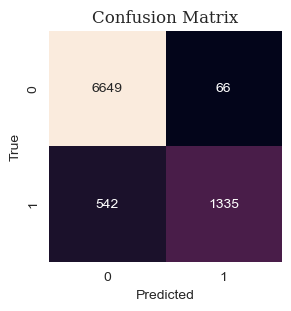

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

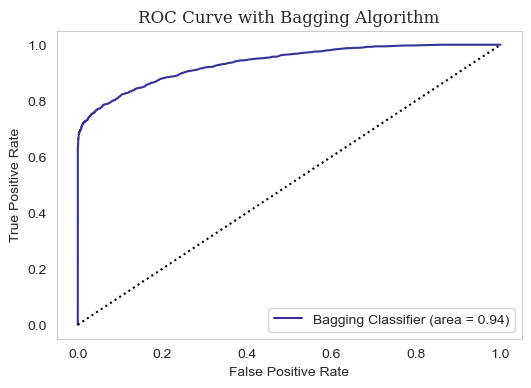

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Bagging Classifier (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Bagging Algorithm', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

**1.4** Random Forest

Random Forest는 Bagging Algorithm 중에서 가장 많이 사용되는 학습기이다. 구조나 원리는 약간 다르지만 거의 동의어로 쓰인다

```
sklearn.ensemble.RandomForestClassifier(
    n_estimators=100, *, 
    criterion='gini', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    class_weight=None, 
    ccp_alpha=0.0, 
    max_samples=None)
```

<center>
<img src="https://miro.medium.com/v2/resize:fit:1400/1*jE1Cb1Dc_p9WEOPMkC95WQ.png" title="RF"/>
</center>

Decision Tree는 과적합되기 쉽다고 알려져 있으며, 이는 예측의 분산을 증가시킨다. Random Forest는 Decision Tree를 추정기를 여러개 모아 결과를 평균 낸 Ensemble Model으로써, 더 낮은 분산을 가지도록 설계되었다

Random Forest는 데이터 중 Bootstrapping된 부분 집합에 대해 Decision Tree 가 추정한 parameter를 독립적으로 학습해 산출한다는 점에서 배깅 알고리즘과 비슷하다. 배깅과 비교해 핵심적인 차이는 Random Forest가 2차 수준의 무작위성을 반영한다는 점이다. 각 node의 분기를 최적화할 떄 속성의 Random subsample만 평가하여 추정기간 상관관계를 더욱 축소하려는 목적을 가지고 있다

Random Forest가 가진 장점으로는 다음과 같다

1. Random Forest가 Bagging처럼 예측 분산을 과적합 없이 줄일수 있다는 것이다 (단, $\bar{\rho} < 1$의 조건이 충족되어야 한다)
2. Random Forest가 Feature Importance를 계산할 수 있는데, 이에 대해서는 마지막 주차에 심층적으로 다룰 예정이다
3. Random Forest가 Out of bag의 정확도를 계산할 수 있다는 것이다. 그러나, 금융 데이터에 적용 시에는 부풀려질 가능성이 존재한다

Bagging Algorithm에서처럼 Random Forest도 개별 Decision Tree보다 더 낮은 편향을 보이지는 않을 것이다

#### example 2

1번의 문제를 RandomForest로 추정해 보자. Hyper Parameter는 다음과 같이 지정한다

```
n_estimator = 1000, class_weight = 'balanced_subsample', criterion = 'entropy', ccp_alpha = 0.001
```

In [13]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 1000,
    class_weight = 'balanced_subsample',
    criterion = 'entropy',
    ccp_alpha = 0.001
)

In [14]:
forest.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced_subsample',
                       criterion='entropy', n_estimators=1000)

In [15]:
y_prob = forest.predict_proba(X_test)[:, 1]
y_pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8958333333333334


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6715
           1       0.77      0.75      0.76      1877

    accuracy                           0.90      8592
   macro avg       0.85      0.84      0.85      8592
weighted avg       0.90      0.90      0.90      8592


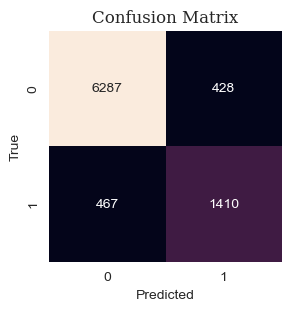

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

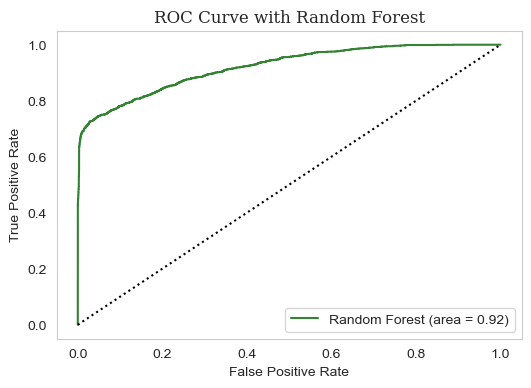

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'darkgreen', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 2. Boosting

Kearns & Valiant는 1989년 논문 "Cryptographic limitations on learning Boolean formulae and finite automania"에서 약한 추정기들을 병합해 더 높은 정확도를 얻을 수 있는지에 대한 의문을 제기한 최초의 사람들에 속한다

그 후, Schapire는 1990년 논문 "The Strength of weak learnability"에서 통상 Boosting이라는 방법을 이용해 실제로 약한 추정기들을 병합하여 추정한 것이 더 높은 정확도를 얻을 수 있다는 것을 증명하였다. Boosting계열 Model은 일반적으로 다음과 같이 작동한다

1. 어떤 sample가중치에 따라 복원 랜덤 샘플링을 활용해 하나의 훈련셋을 생성한다
2. 하나의 추정기를 이 훈련 데이터셋을 사용해 적합화한다
3. 단일 추정기가 허용하는 threshold값보다 더 높은 정확도를 얻으면 그 추정기는 유지하고, 그렇지 않으면 폐기한다
4. 잘못 분류된 관측값에 대해서는 더 많은 가중값을 부여하고, 정확히 분류된 관측값에서는 더 적은 가중값을 부여한다
5. 지정한 N개의 추정기가 생성될 때까지 이 과정을 반복한다
6. Ensemble 예측은 N개의 모델에서 나온 개별 예측의 평균인데 가중값은 개별 추정기의 정확도에 따라 결정된다

**2.1 AdaBoost**

Adaptive Boosting의 줄임말이다. 단어에서 볼 수 있듯이, 부스팅 모형이긴 한데 sequence를 지날 때마다 적응을 시킨다는 의미이다

<center>
<img src="./image/adaboost.png" title="adaboost"/>
</center>

```
sklearn.ensemble.AdaBoostClassifier(
    estimator=None, *, 
    n_estimators=50, 
    learning_rate=1.0, 
    algorithm='SAMME.R', 
    random_state=None, 
    base_estimator='deprecated')
```

In [20]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(
    max_depth = 1,
    criterion = 'entropy',
    class_weight = 'balanced',
    random_state = 42
)
adaboost = AdaBoostClassifier(
    tree,
    n_estimators = 1000,
    random_state = 42
)

In [21]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    max_depth=1,
                                                    random_state=42),
                   n_estimators=1000, random_state=42)

In [22]:
y_prob = adaboost.predict_proba(X_test)[:, 1]
y_pred = adaboost.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.854050279329609


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      6715
           1       0.63      0.79      0.70      1877

    accuracy                           0.85      8592
   macro avg       0.78      0.83      0.80      8592
weighted avg       0.87      0.85      0.86      8592


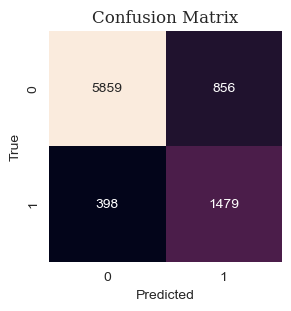

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

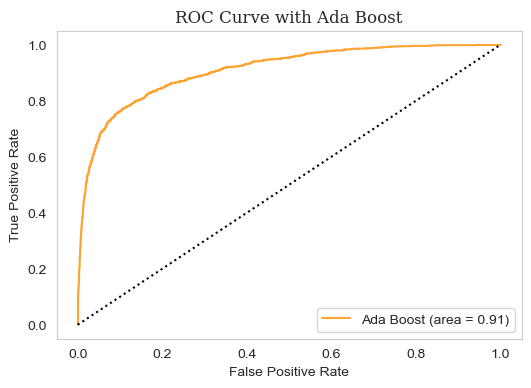

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Ada Boost (area = {:.2f})'.format(roc_auc), color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Ada Boost', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

**2.2 Gradient Boosting**

<center>
<img src="./image/gradientBoost.png" title="adaboost"/>
</center>


```
sklearn.ensemble.GradientBoostingClassifier(*, 
    loss='log_loss', 
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    criterion='friedman_mse', 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_depth=3, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=None, 
    max_features=None, 
    verbose=0, 
    max_leaf_nodes=None, 
    warm_start=False, 
    validation_fraction=0.1, 
    n_iter_no_change=None, 
    tol=0.0001, 
    ccp_alpha=0.0)
```

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(
    n_estimators = 1000, 
    learning_rate = 1.0, 
    max_depth = 1, 
    random_state = 42
)

In [28]:
gradient.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=1000,
                           random_state=42)

In [29]:
y_prob = gradient.predict_proba(X_test)[:, 1]
y_pred = gradient.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8903631284916201


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6715
           1       0.81      0.65      0.72      1877

    accuracy                           0.89      8592
   macro avg       0.86      0.80      0.83      8592
weighted avg       0.89      0.89      0.89      8592


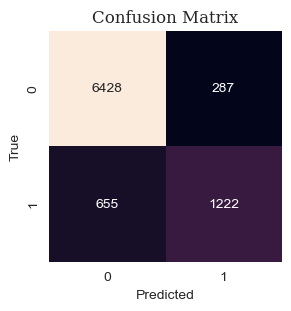

In [31]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

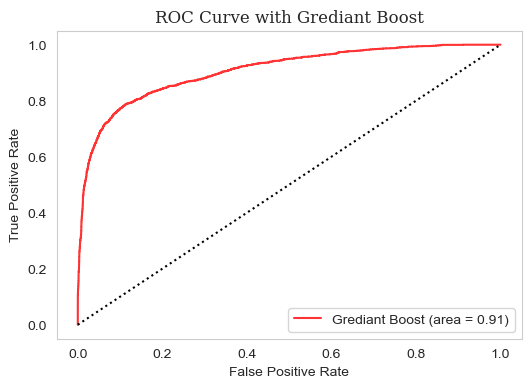

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Grediant Boost (area = {:.2f})'.format(roc_auc), color = 'red', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Grediant Boost', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

**2.3 Cat Boost**

Gradient Boosting 계열 알고리즘 중 가장 최신 알고리즘이다. 무조건 순차적으로만 Tree를 분기하던 기본의 Gradient Boosting 계열 알고리즘과는 다르게, depth를 추가할 때마다 모든 추정기의 분기를 동시에 진행함으로써 Boosting계열 알고리즘의 가장 큰 약점이었던 과적합 위험을 어느정도 제어하는데 성공하였다

XG boost와 LGBM의 결과는 Gradient Boost와 결과가 크게 달라지지 않으므로, Gradient Boosting과 비교하면서 보도록 한다.

```
class CatBoostClassifier(iterations=None, learning_rate=None, depth=None, l2_leaf_reg=None, model_size_reg=None, rsm=None,
                         loss_function=None, border_count=None, feature_border_type=None, per_float_feature_quantization=None,
                         input_borders=None, output_borders=None, fold_permutation_block=None, od_pval=None, od_wait=None,
                         od_type=None, nan_mode=None, counter_calc_method=None, leaf_estimation_iterations=None,
                         leaf_estimation_method=None, thread_count=None, random_seed=None, use_best_model=None,
                         verbose=None, logging_level=None, metric_period=None, ctr_leaf_count_limit=None,
                         store_all_simple_ctr=None, max_ctr_complexity=None, has_time=None, allow_const_label=None,
                         classes_count=None, class_weights=None, auto_class_weights=None, one_hot_max_size=None,
                         random_strength=None, name=None, ignored_features=None, train_dir=None, custom_loss=None,
                         custom_metric=None, eval_metric=None, bagging_temperature=None, save_snapshot=None,
                         snapshot_file=None, snapshot_interval=None, fold_len_multiplier=None, used_ram_limit=None,
                         gpu_ram_part=None, allow_writing_files=None, final_ctr_computation_mode=None, approx_on_full_history=None,
                         boosting_type=None, simple_ctr=None, combinations_ctr=None, per_feature_ctr=None, task_type=None,
                         device_config=None, devices=None, bootstrap_type=None, subsample=None, sampling_unit=None,
                         dev_score_calc_obj_block_size=None, max_depth=None, n_estimators=None, num_boost_round=None,
                         num_trees=None, colsample_bylevel=None, random_state=None, reg_lambda=None, objective=None,
                         eta=None, max_bin=None, scale_pos_weight=None, gpu_cat_features_storage=None, data_partition=None,
                         metadata=None, early_stopping_rounds=None, cat_features=None, grow_policy=None,
                         min_data_in_leaf=None, min_child_samples=None, max_leaves=None, num_leaves=None,
                         score_function=None, leaf_estimation_backtracking=None, ctr_history_unit=None,
                         monotone_constraints=None, feature_weights=None, penalties_coefficient=None, first_feature_use_penalties=None,
                         model_shrink_rate=None, model_shrink_mode=None, langevin=None, diffusion_temperature=None,
                         posterior_sampling=None, boost_from_average=None, text_features=None, tokenizers=None,
                         dictionaries=None, feature_calcers=None, text_processing=None, fixed_binary_splits=None)
```

Catboost가 성능은 굉장히 좋지만, 그만큼 Hyper parameter의 개수가 엄청나게 많다. 모두 다 외우려고 하는 것 보다는 중요한 parameter 몇 개만 알아두도록 하자

In [36]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(
    class_weight = 'balanced', 
    classes = classes, 
    y = y_train
)
class_weights = dict(zip(classes, weights))

Cat Boost에서는 Random Forest혹은 Bagging의 sample_weight를 지정할 수 없기 때문에 위와 같이 직접 지정해주는 과정이 필요하다

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(
    class_weights = class_weights,
    n_estimators = 1000,
    loss_function = 'Logloss',
    random_state = 42,
    learning_rate = 0.1,
    verbose = 0
)

loss function(손실함수)이 logloss인 것은 entropy와 같은 것이니 logloss로 지정하자. learning rate는 학습 속도에 관한 parameter이기 때문에, 데이터의 속성에 따라 달라질 수 있다

verbose = 0으로 두면 training log가 출력되지 않아 깔끔하다

In [37]:
cat.fit(X_train, y_train)

In [38]:
y_prob = cat.predict_proba(X_test)[:, 1]
y_pred = cat.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9214385474860335


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6715
           1       0.85      0.78      0.81      1877

    accuracy                           0.92      8592
   macro avg       0.89      0.87      0.88      8592
weighted avg       0.92      0.92      0.92      8592


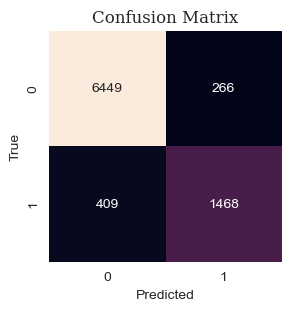

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

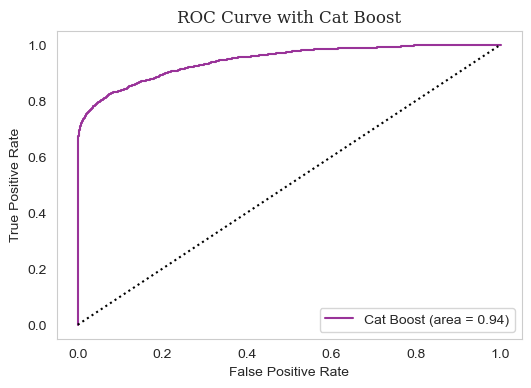

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Cat Boost (area = {:.2f})'.format(roc_auc), color = 'purple', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cat Boost', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### 3. Boosting vs Bagging

앞에서 설명한 것처럼 Boosting은 몇 가지 측면에서 배깅과 상당히 다르다.
- 개별 분류기가 순차적으로 적합화된다
- 성능이 나쁜 분류기는 퇴출된다
- 관측값의 가중치를 각 반복 시행마다 다르게 부여한다
- Ensemble 예측은 개별 학습기의 가중 평균이다

Boosting의 주요 장점은 예측의 분산과 평향 둘 다 감소시킨다는 것이다. 그러나 편향을 교정하면 과적합이 될 위험성이 커진다. 금융에 있어서는 Boosting보다 Bagging이 일반적으로 더 선호된다고 주장할 수 있다. **Boosting은 Underfitting을, Bagging은 Overfitting을 다룬다.** Overfitting은 종종 Underfitting보다 더 문제가 된다. 그 이유는 금융 데이터에 있어서 Machine Learning 알고리즘을 과적합하는것은 낮은 신호 대 잡음 비율로 인해 그리 어려운 일이 아니기 떄문이다. 게다가 Bagging은 병렬 처리가 가능하지만, 일반적으로 Boosting은 순차적으로 수행해야 한다. 오차를 줄이는 것을 목적함수로 두고 순차적으로 학습을 하기 때문에 과적합을 일으킬 가능성이 크다